In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df=pd.read_csv("DataAnalyst.csv")

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [4]:
df.sample(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
755,755,Data Analyst,$73K-$82K (Glassdoor est.),Collaborate with the Data Governance capabilit...,3.9,"TEKsystems, Inc\n3.9","Chicago, IL","Hanover, MD",1001 to 5000 employees,1983,Subsidiary or Business Segment,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Capgemini, Slalom, Accenture",-1
1358,1358,System/Data Analyst,$30K-$53K (Glassdoor est.),Job Description :* Exposure to Capital Market ...,3.5,L&T Infotech\n3.5,"Irving, TX","Mumbai, India",10000+ employees,1997,Company - Public,IT Services,Information Technology,Unknown / Non-Applicable,"Infosys, Accenture, Capgemini",-1
396,396,Technical Analyst - Access/Identity Data Security,$98K-$114K (Glassdoor est.),"Primary Responsibilities\nInstalling, configur...",-1.0,C&G Consulting Services,"Hoboken, NJ",-1,-1,-1,-1,-1,-1,-1,-1,-1
249,249,"Principal Data Analyst, LATAM Disney Streaming...",$45K-$88K (Glassdoor est.),Job Summary:\nComprised of Disneys internation...,4.0,Walt Disney Company\n4.0,"New York, NY","Burbank, CA",10000+ employees,1923,Company - Public,Motion Picture Production & Distribution,Media,$10+ billion (USD),"News Corp, WarnerMedia, NBCUniversal",-1
1973,1973,Finance Data Analyst,$82K-$116K (Glassdoor est.),Qualys is seeking a Sales Finance Data Analyst...,3.0,Qualys\n3.0,"Foster City, CA","Foster City, CA",501 to 1000 employees,1999,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"NortonLifeLock, McAfee, Verisign",-1


In [5]:
df.shape

(2253, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

### Ques1: Create a bar plot of job counts for from top 5 industries

In [7]:
industry_count=df['Industry'].value_counts().head(6).iloc[1:]

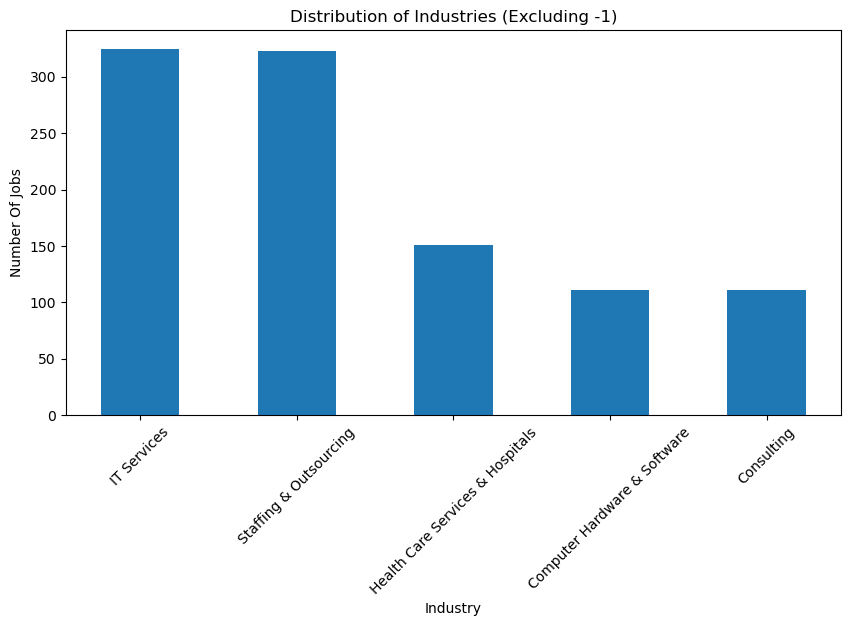

In [8]:
plt.figure(figsize=(10,5))

#plotting a bar chart 
plt.bar(industry_count.index,industry_count.values, width=0.5)

#rotatingx-axis labels for better readability
plt.xticks(rotation=45)

#setting labels, title for plot
plt.xlabel('Industry')
plt.ylabel('Number Of Jobs')
plt.title('Distribution of Industries (Excluding -1)')
plt.show()

### Ques2: Create a bar plot of mean salary estimate from the same top 5 industries

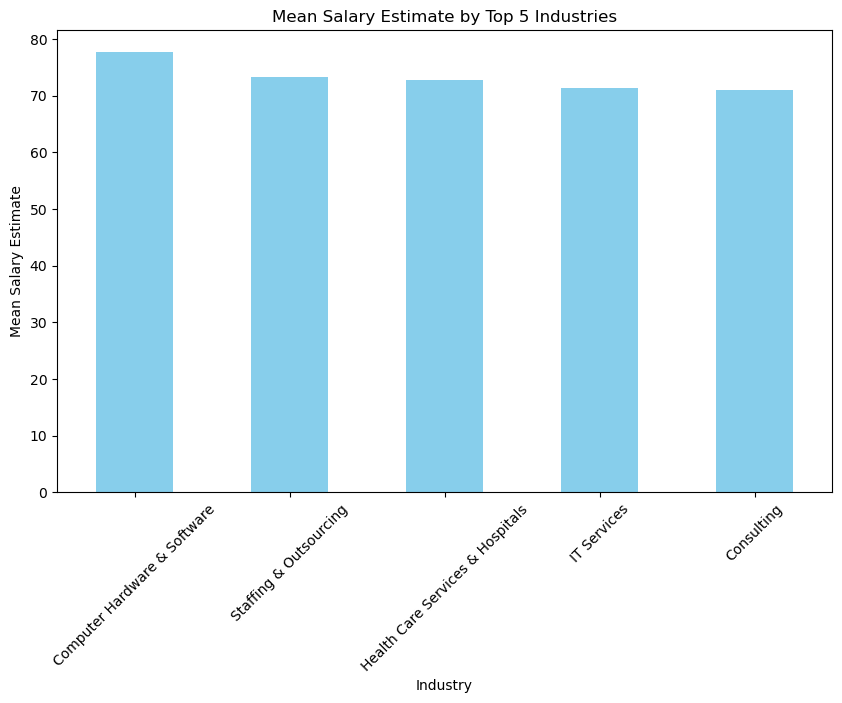

In [9]:
# Clean the "Salary Estimate" column and extract the mid-salary values
def clean_salary(salary):
    match = re.search(r'\$(\d+)K-\$(\d+)K', salary)
    if match:
        lower_salary = int(match.group(1))
        upper_salary = int(match.group(2))
        mid_salary = (lower_salary + upper_salary) / 2
        return mid_salary
    else:
        return None
#filtering only rows in top 5 industries
df=df[df['Industry'].isin(industry_count.index.tolist())]
df['Mid Salary'] = df['Salary Estimate'].apply(clean_salary)

# Group by "Industry" and calculate the mean salary estimate
industry_salary_mean = df.groupby('Industry')['Mid Salary'].mean().sort_values(ascending=False)

# Select the top 5 industries
top_5_industries = industry_salary_mean.head(5)

# Creating a bar plot
plt.figure(figsize=(10, 6))
top_5_industries.plot(kind='bar', color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Mean Salary Estimate')
plt.title('Mean Salary Estimate by Top 5 Industries')
plt.xticks(rotation=45)

plt.show()


### Ques: Top five easy to apply companies

In [10]:
fil_df = df[df['Easy Apply'] != '-1']

In [11]:
fil_df['Easy Apply'].unique() #checking if the filter condition worked well

array(['True'], dtype=object)

In [12]:
top_5_company_counts = fil_df['Company Name'].value_counts().sort_values(ascending=False).head(5)

# Display the top 5 counts
print(top_5_company_counts)

Apex Systems\n3.8                 10
22nd Century Technologies\n3.7     5
Signify Health\n3.6                3
22nd Century Staffing\n4.3         2
Dextro Software Systems\n3.5       1
Name: Company Name, dtype: int64


### Ques: What is the average estimated salary range for data analyst jobs in a particular city?

In [13]:
print(df['Location'].unique())

['New York, NY' 'Brooklyn, NY' 'Jersey City, NJ' 'Weehawken, NJ'
 'Manhasset, NY' 'Newark, NJ' 'Haworth, NJ' 'Little Ferry, NJ'
 'Lake Success, NY' 'Summit, NJ' 'Franklin Lakes, NJ' 'Mount Vernon, NY'
 'Secaucus, NJ' 'Florham Park, NJ' 'Parsippany, NJ' 'Whippany, NJ'
 'Hoboken, NJ' 'West Orange, NJ' 'Staten Island, NY' 'Montvale, NJ'
 'Woodcliff Lake, NJ' 'Bronx, NY' 'Salt Lake City, UT' 'Draper, UT'
 'American Fork, UT' 'Riverton, UT' 'Reedley, CA' 'Norfolk, VA'
 'Hampton, VA' 'Chesapeake, VA' 'Suffolk, VA' 'Virginia Beach, VA'
 'Fort Eustis, VA' 'Gainesville, FL' 'Alachua, FL' 'El Segundo, CA'
 'Hermosa Beach, CA' 'Los Angeles, CA' 'Burbank, CA' 'Culver City, CA'
 'Inglewood, CA' 'Glendale, CA' 'Cerritos, CA' 'Irwindale, CA'
 'Beverly Hills, CA' 'Pasadena, CA' 'Woodland Hills, CA'
 'Santa Monica, CA' 'Alhambra, CA' 'Azusa, CA' 'Arcadia, CA' 'Gardena, CA'
 'Pico Rivera, CA' 'Whittier, CA' 'Chicago, IL' 'Downers Grove, IL'
 'Northbrook, IL' 'Evanston, IL' 'Maywood, IL' 'Houston, TX'
 '

In [14]:
location=input("Enter City you want to find average salary:")
ny_jobs = df[df['Location'].str.contains(location)]
avg_salary = ny_jobs['Mid Salary'].mean()
print("The average estimated salary for data analyst jobs in" +""+location+ "is: $" + "{:.2f}".format(avg_salary) + "K")

Enter City you want to find average salary:New York
The average estimated salary for data analyst jobs inNew Yorkis: $73.56K


### Ques: Top Data Analyst Roles

In [15]:
df['Job Title'].value_counts().head(10)

Data Analyst                            202
Senior Data Analyst                      25
Junior Data Analyst                      19
Data Analyst Junior                      17
Business Data Analyst                    16
Sr. Data Analyst                         12
Data Reporting Analyst                   10
Data Quality Analyst                     10
Data Governance Analyst                   9
NY Healthcare Data/Reporting Analyst      5
Name: Job Title, dtype: int64

### Ques: Some top skills needed for Data Analyst Job

In [16]:
skills = ['SQL', 'PYTHON', 'EXCEL', 'TABLEAU', 'R', 'JAVA']
for skill in skills:
    print(skill,df['Job Description'].str.upper().str.contains(skill).sum())

SQL 646
PYTHON 229
EXCEL 585
TABLEAU 252
R 1020
JAVA 125


### Ques: Checking for any temporary roles

In [17]:
# Checking for any Temporary roles
print(df['Job Title'].str.contains('Temporary').sum())

2


### Ques: Top Companies Hiring Data Analysts

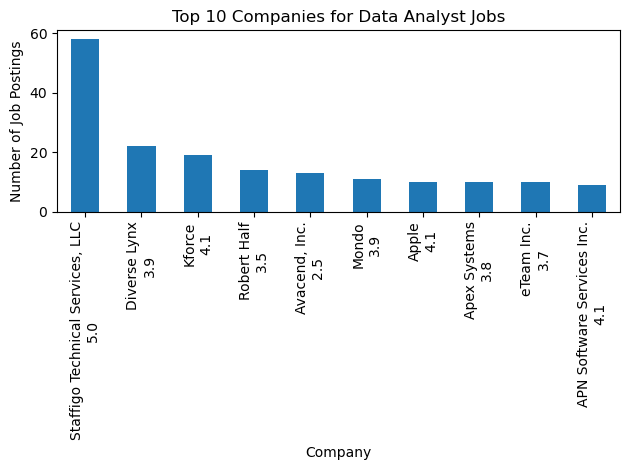

In [20]:
job_counts = df['Company Name'].value_counts()

# Plot 10 companies with most Data Analysts jobs
job_counts[:10].plot.bar()

plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Companies for Data Analyst Jobs')

plt.tight_layout() # to adjust space between bars and label
plt.show()

### Ques: Are data analyst salaries different between nonprofit vs for-profit companies?

In [19]:
print(df[df['Type of ownership']=='Nonprofit Organization']['Mid Salary'].mean())
print(df[df['Type of ownership']!='Nonprofit Organization']['Mid Salary'].mean())

68.5327868852459
73.07977059436914


* From above we can see Non Profit Organizations tend to offer a bit less salary than Profit Organizations